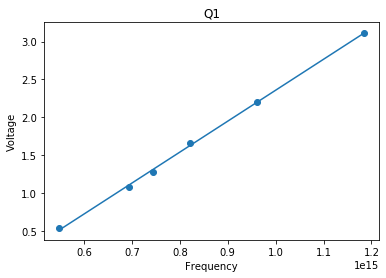

We computed h = 6.549340228345061e-34 m^2 kg s^-1, which is 1.158445717012108 percent off from the accepted value for Planck's constant.


In [46]:
##Question 1:  Linear fitting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

raw = np.loadtxt("millikan.txt")
xvals = raw[:,0]
yvals = raw[:,1]
N = len(xvals)
sumx = 0.0
sumy = 0.0
sumxx = 0.0
sumxy = 0.0
for i in range(0, N):
    sumx += xvals[i]
    sumy += yvals[i]
    sumxy += xvals[i]*yvals[i]
    sumxx += xvals[i]*xvals[i]

Ex = sumx / N
Ey = sumy / N
Exx = sumxx / N
Exy = sumxy / N

m = (Exy - Ex*Ey) / (Exx - Ex**2)
b = (Exx*Ey - Ex*Exy) / (Exx - Ex**2)

bestfityvals = []

for j in range(0, N):
    bestfityvals.append(m*xvals[j] + b)

plt.scatter(xvals, yvals)
plt.plot(xvals, bestfityvals)
plt.title("Q1")
plt.xlabel("Frequency")
plt.ylabel("Voltage")
plt.show()

## m = h/e so we multiply m by e to get Plancks constant
echarge = 1.602e-19     #Coulomb
h = m*echarge

##actual h = 6.6261e-34
realh = 6.6261e-34 ## m^2 kg s^-1

accuracy = ((realh - h)/realh)*100

print("We computed h = {} m^2 kg s^-1, which is {} percent off from the accepted value for Planck's constant.".format(h, accuracy))

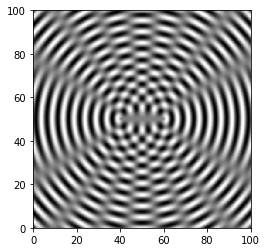

In [57]:
##Question 2: Wave interference
from math import pi, sin, sqrt
from numpy import empty
from pylab import imshow,gray,show, savefig

wavelength = 5.0  ##wavelength
k = 2*pi / wavelength 
psi0 = 1.0 ##starting amplitude
sep = 20.0
dim = 100.0
points = 500
spacing = dim / points

x1, y1 = dim / 2 + sep / 2, dim / 2
x2, y2 = dim / 2 - sep / 2, dim / 2

xi = empty([points, points], float)

def psi(x, y):
    r1 = sqrt((x - x1)**2 + (y - y1)**2)
    r2 = sqrt((x - x2)**2 + (y - y2)**2)
    return psi0*(sin(k*r1)+sin(k*r2))

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = psi(x, y)

imshow(xi,origin="lower",extent=[0,dim,0,dim])
gray()
show()

In [91]:
##moving waves
v = 8.0  ##cm/s
T = wavelength / v
n = 100
def psi(x, y, t):
    r1 = sqrt((x - x1)**2 + (y - y1)**2)
    r2 = sqrt((x - x2)**2 + (y - y2)**2)
    return psi0*(sin(k*(r1 - v*t))+sin(k*(r2 - v*t)))

step = T/n
tz = 0
#comment this in to generate n png files. note that gif has already been made
# for z in range(0, n):
#     tz = z + step
#     xi = empty([points, points], float)
#     for i in range(points):
#         y = spacing*i
#         for j in range(points):
#             x = spacing*j
#             xi[i, j] = psi(x, y, tz)
#     imshow(xi,origin="lower",extent=[0,dim,0,dim]) 
#     savefig("plot(%d).png" % z)
    

In [1]:
##Question 3: Damped harmonic motion
import vpython as vp
from math import exp, cos, sqrt, atan

# Set up scene
scene = vp.canvas(background = vp.color.white, width=600, height=600)

# set up graphs
vp.graph(width=400, height=250, xtitle="Time", ytitle="Position")
xDots = vp.gdots(color=vp.color.green, label="x")
xDots.plot(0,0)

# Coordinate axes
axisColor = vp.vector(0.5, 0.5, 0.5)

xaxis = vp.helix(pos=vp.vector(0,0,0), axis=vp.vector(0.5,0,0), radius = 0.25, coils=5, color=axisColor)

# Box
movingBox = vp.box(pos=vp.vector(4,0,0), size=vp.vector(1,1,1), color=vp.color.red, make_trail=False)
t = 0.0

def disp(t):
    k = 100
    m = 10.0
    b = 2.0
    w = sqrt((k/m) - (b/(2*m))**2)
    phi = atan(-b/(2*m*w))
    return 4.0 * exp(-b*t/(2*m)) * cos(w*t + phi)

while movingBox.pos.x < 10:
    vp.rate(10)
    d = disp(t)
    movingBox.pos.x = d
    xaxis.length = d
    t += 0.1
    xDots.plot(t,movingBox.pos.x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#Question 4
def itan(x):
    sum = 0
    for n in range(10000):
        sum += (((-1)**n)*x**(2*n +1) / (2*n + 1))
    return sum

pi1 = itan(1)*4
print(pi1)
pi2 = 4*(4*itan(1/5) - itan(1/239))
print(pi2)



3.1414926535900345
3.141592653589794
